In [1]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
# importando o database
db = pd.read_csv('Sprint3 Diabetes.csv')

print(db.head())

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

In [3]:
# remoção de duplicatas
db.drop_duplicates(inplace=True)
print(db.shape)

# identificação de valores nulos
print(db.isnull().sum())

(229781, 22)
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [4]:
# função para identificar e tratar outliers usando o método IQR
def tratar_outliers_iqr(df, coluna):
  Q1 = df[coluna].quantile(0.25)
  Q3 = df[coluna].quantile(0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR
  df[coluna] = np.where(df[coluna] < limite_inferior, limite_inferior, df[coluna])
  df[coluna] = np.where(df[coluna] > limite_superior, limite_superior, df[coluna])
  return df

# aplicar o tratamento de outliers para as colunas numéricas
colunas_numericas = db.select_dtypes(include=np.number).columns
for coluna in colunas_numericas:
  db = tratar_outliers_iqr(db, coluna)
    
# estatísticas descritivas das variáveis
print(db.describe())

       Diabetes_012         HighBP       HighChol  CholCheck            BMI  \
count      229781.0  229781.000000  229781.000000   229781.0  229781.000000   
mean            0.0       0.454441       0.441760        1.0      28.467902   
std             0.0       0.497921       0.496598        0.0       5.883803   
min             0.0       0.000000       0.000000        1.0      12.000000   
25%             0.0       0.000000       0.000000        1.0      24.000000   
50%             0.0       0.000000       0.000000        1.0      27.000000   
75%             0.0       1.000000       1.000000        1.0      32.000000   
max             0.0       1.000000       1.000000        1.0      44.000000   

              Smoker    Stroke  HeartDiseaseorAttack   PhysActivity  \
count  229781.000000  229781.0              229781.0  229781.000000   
mean        0.465661       0.0                   0.0       0.733355   
std         0.498821       0.0                   0.0       0.442206   
min 

In [5]:
# correlação de Spearman entre HeartDiseaseorAttack e Diabetes_012
correlation = db[['HeartDiseaseorAttack', 'Diabetes_012']].corr(method='spearman')
print(correlation)

# tabela de contingência entre Diabetes_012 e HeartDiseaseorAttack
contingency_table = pd.crosstab(db['Diabetes_012'], db['HeartDiseaseorAttack'])

                      HeartDiseaseorAttack  Diabetes_012
HeartDiseaseorAttack                   NaN           NaN
Diabetes_012                           NaN           NaN


In [6]:
# teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-valor: {p}")
alpha = 0.05
if p < alpha:
  print("Há uma associação significativa entre diabetes e doenças cardíacas.")
else:
  print("Não há uma associação significativa entre diabetes e doenças cardíacas.")


Chi2: 0.0, p-valor: 1.0
Não há uma associação significativa entre diabetes e doenças cardíacas.


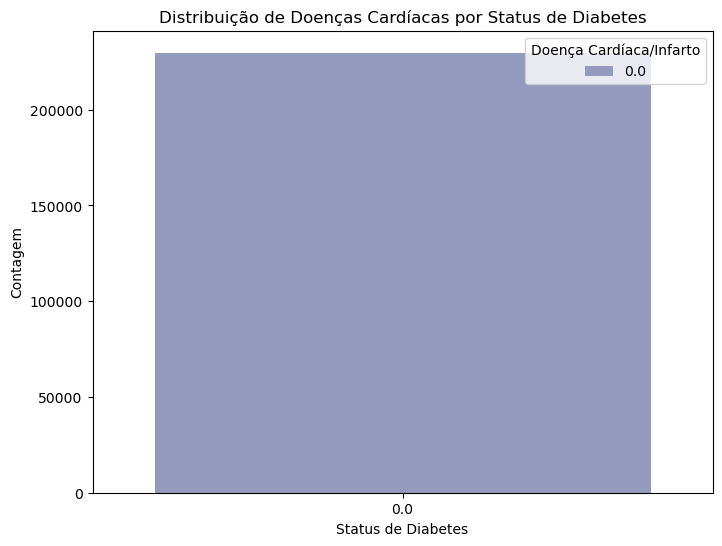

In [7]:
# contagem de casos de diabetes e doenças cardíacas
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', hue='HeartDiseaseorAttack', data=db, palette='BuPu')
plt.title('Distribuição de Doenças Cardíacas por Status de Diabetes')
plt.xlabel('Status de Diabetes')
plt.ylabel('Contagem')
plt.legend(title='Doença Cardíaca/Infarto')
plt.show()

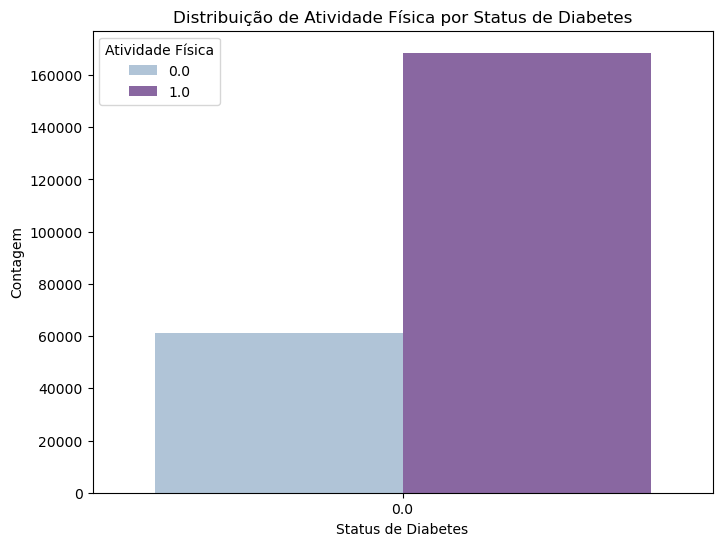

In [8]:
# contagem de casos de diabetes por nível de atividade física
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', hue='PhysActivity', data=db, palette='BuPu')
plt.title('Distribuição de Atividade Física por Status de Diabetes')
plt.xlabel('Status de Diabetes')
plt.ylabel('Contagem')
plt.legend(title='Atividade Física')
plt.show()

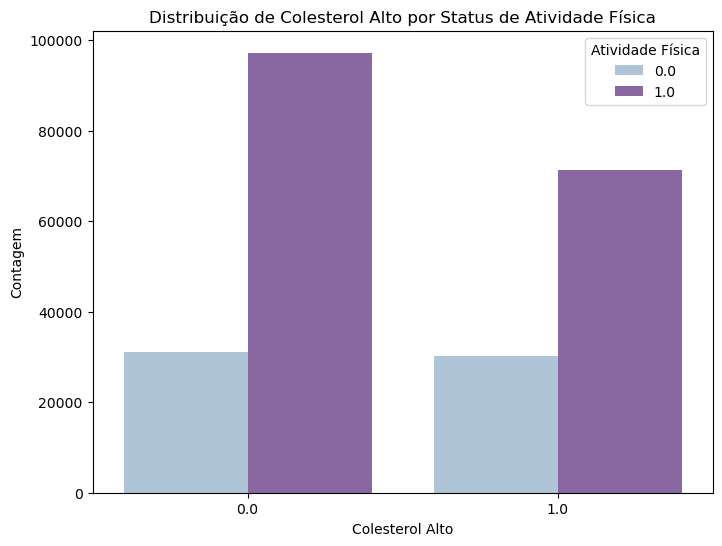

In [9]:
# contagem de casos de colesterol alto por nível de atividade física
plt.figure(figsize=(8, 6))
sns.countplot(x='HighChol', hue='PhysActivity', data=db, palette='BuPu')
plt.title('Distribuição de Colesterol Alto por Status de Atividade Física')
plt.xlabel('Colesterol Alto')
plt.ylabel('Contagem')
plt.legend(title='Atividade Física')
plt.show()


In [10]:
# correlação entre Atividade Física, Diabetes e Colesterol Alto
correlation = db[['PhysActivity', 'Diabetes_012', 'HighChol']].corr(method='spearman')
print(correlation)


              PhysActivity  Diabetes_012  HighChol
PhysActivity      1.000000           NaN -0.063266
Diabetes_012           NaN           NaN       NaN
HighChol         -0.063266           NaN  1.000000


In [11]:
# tabela de contingência entre Atividade Física e Diabetes
contingency_table_pa_diabetes = pd.crosstab(db['PhysActivity'], db['Diabetes_012'])

# teste qui-quadrado
chi2_pa_diabetes, p_pa_diabetes, dof_pa_diabetes, expected_pa_diabetes = chi2_contingency(contingency_table_pa_diabetes)
print(f"Chi2: {chi2_pa_diabetes}, p-valor: {p_pa_diabetes}")

Chi2: 0.0, p-valor: 1.0


In [12]:
# tabela de contingência entre Atividade Física e Colesterol Alto
contingency_table_pa_highchol = pd.crosstab(db['PhysActivity'], db['HighChol'])

# teste qui-quadrado
chi2_pa_highchol, p_pa_highchol, dof_pa_highchol, expected_pa_highchol = chi2_contingency(contingency_table_pa_highchol)
print(f"Chi2: {chi2_pa_highchol}, p-valor: {p_pa_highchol}")

Chi2: 919.440478918068, p-valor: 5.8310124169016175e-202


In [13]:
# tabela de contingência entre diabetes e consumo excessivo de álcool
contingency_table = pd.crosstab(db['Diabetes_012'], db['HvyAlcoholConsump'])
print(contingency_table)

# teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# resultados do teste
print(f"Valor Qui-quadrado: {chi2}")
print(f"Valor p: {p}")
alpha = 0.05
if p < alpha:
  print("Há uma associação significativa entre diabetes e consumo excessivo de álcool.")
else:
  print("Não há uma associação significativa entre diabetes e consumo excessivo de álcool.")

HvyAlcoholConsump     0.0
Diabetes_012             
0.0                229781
Valor Qui-quadrado: 0.0
Valor p: 1.0
Não há uma associação significativa entre diabetes e consumo excessivo de álcool.


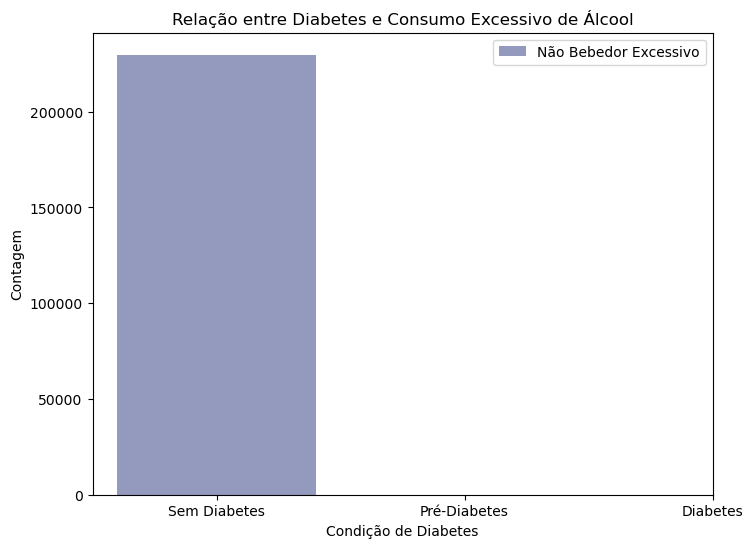

In [14]:
# gráfico de barras empilhadas
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', hue='HvyAlcoholConsump', data=db, palette='BuPu')
plt.title('Relação entre Diabetes e Consumo Excessivo de Álcool')
plt.xlabel('Condição de Diabetes')
plt.ylabel('Contagem')
plt.xticks([0, 1, 2], ['Sem Diabetes', 'Pré-Diabetes', 'Diabetes'], rotation=0)
plt.legend(['Não Bebedor Excessivo', 'Bebedor Excessivo'])
plt.show()


            MentHlth       PhysHlth  Diabetes_012
count  229781.000000  229781.000000      229781.0
mean        1.288553       2.474339           0.0
std         2.012427       3.806870           0.0
min         0.000000       0.000000           0.0
25%         0.000000       0.000000           0.0
50%         0.000000       0.000000           0.0
75%         2.000000       4.000000           0.0
max         5.000000      10.000000           0.0


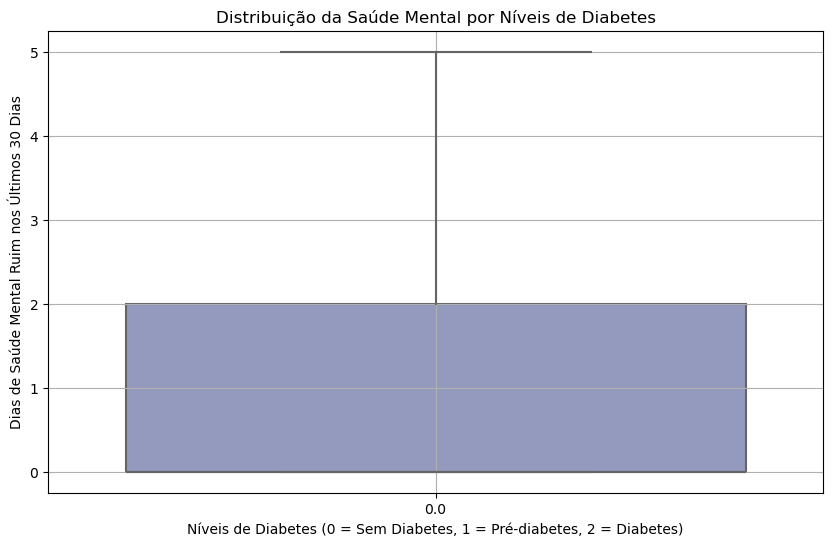

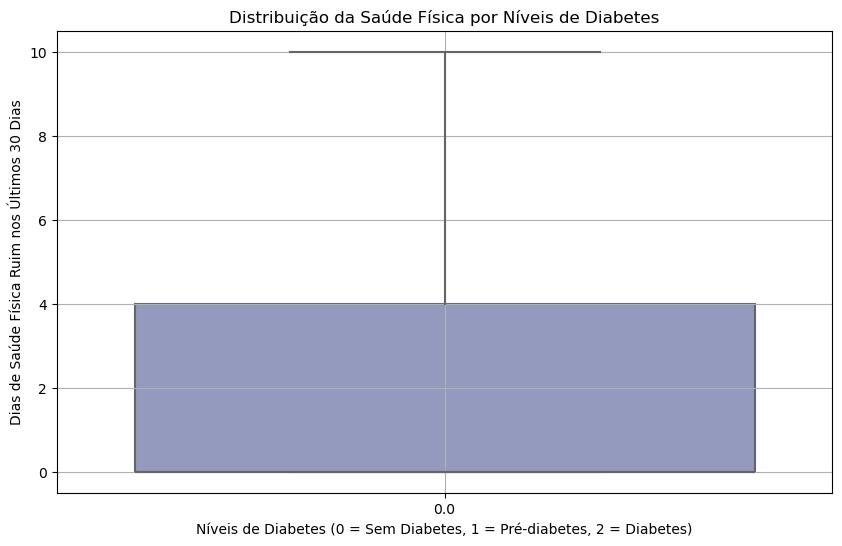


Matriz de Correlação entre Saúde Mental, Física e Diabetes:
              MentHlth  PhysHlth  Diabetes_012
MentHlth      1.000000  0.290627           NaN
PhysHlth      0.290627  1.000000           NaN
Diabetes_012       NaN       NaN           NaN


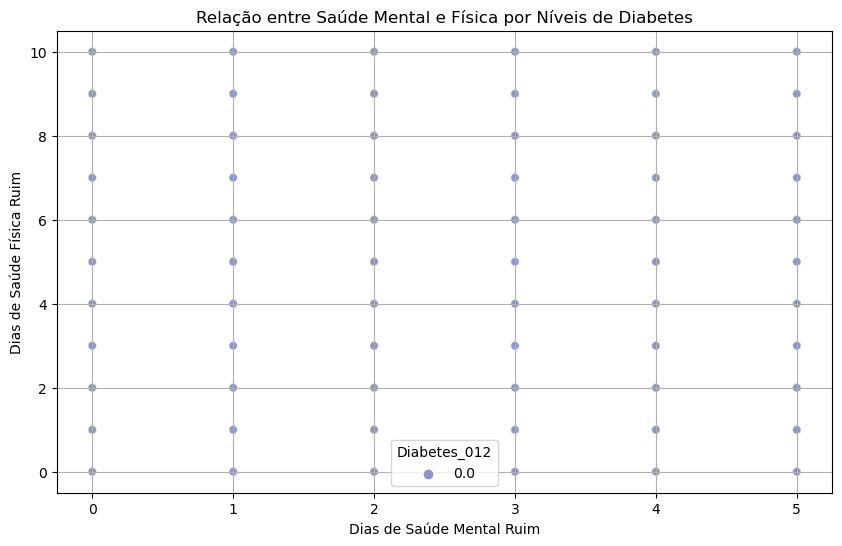


Kruskal-Wallis Teste para Saúde Mental: Estatística = nan, p-valor = nan
Kruskal-Wallis Teste para Saúde Física: Estatística = nan, p-valor = nan


In [15]:
from scipy.stats import kruskal

# estatísticas descritivas das variáveis MentHlth, PhysHlth e Diabetes_012
print(db[['MentHlth', 'PhysHlth', 'Diabetes_012']].describe())

# boxplot de Saúde Mental por níveis de Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_012', y='MentHlth', data=db, palette='BuPu')
plt.title('Distribuição da Saúde Mental por Níveis de Diabetes')
plt.xlabel('Níveis de Diabetes (0 = Sem Diabetes, 1 = Pré-diabetes, 2 = Diabetes)')
plt.ylabel('Dias de Saúde Mental Ruim nos Últimos 30 Dias')
plt.grid(True)
plt.show()

# boxplot de Saúde Física por níveis de Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_012', y='PhysHlth', data=db, palette='BuPu')
plt.title('Distribuição da Saúde Física por Níveis de Diabetes')
plt.xlabel('Níveis de Diabetes (0 = Sem Diabetes, 1 = Pré-diabetes, 2 = Diabetes)')
plt.ylabel('Dias de Saúde Física Ruim nos Últimos 30 Dias')
plt.grid(True)
plt.show()

# correlação entre Saúde Mental, Saúde Física e Diabetes
correlation_matrix = db[['MentHlth', 'PhysHlth', 'Diabetes_012']].corr()
print("\nMatriz de Correlação entre Saúde Mental, Física e Diabetes:")
print(correlation_matrix)

# gráfico de dispersão Saúde Mental x Saúde Física colorido por Diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MentHlth', y='PhysHlth', hue='Diabetes_012', data=db, palette='BuPu', alpha=0.6)
plt.title('Relação entre Saúde Mental e Física por Níveis de Diabetes')
plt.xlabel('Dias de Saúde Mental Ruim')
plt.ylabel('Dias de Saúde Física Ruim')
plt.grid(True)
plt.show()

# teste de Hipótese: Kruskal-Wallis para verificar diferença nos níveis de Saúde Mental e Física entre grupos de Diabetes
stat_menthlth, p_menthlth = kruskal(db['MentHlth'][db['Diabetes_012'] == 0],
                                    db['MentHlth'][db['Diabetes_012'] == 1],
                                    db['MentHlth'][db['Diabetes_012'] == 2])

stat_physhlth, p_physhlth = kruskal(db['PhysHlth'][db['Diabetes_012'] == 0],
                                    db['PhysHlth'][db['Diabetes_012'] == 1],
                                    db['PhysHlth'][db['Diabetes_012'] == 2])

print(f"\nKruskal-Wallis Teste para Saúde Mental: Estatística = {stat_menthlth:.2f}, p-valor = {p_menthlth:.4f}")
print(f"Kruskal-Wallis Teste para Saúde Física: Estatística = {stat_physhlth:.2f}, p-valor = {p_physhlth:.4f}")



C:\Users\livia\miniconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


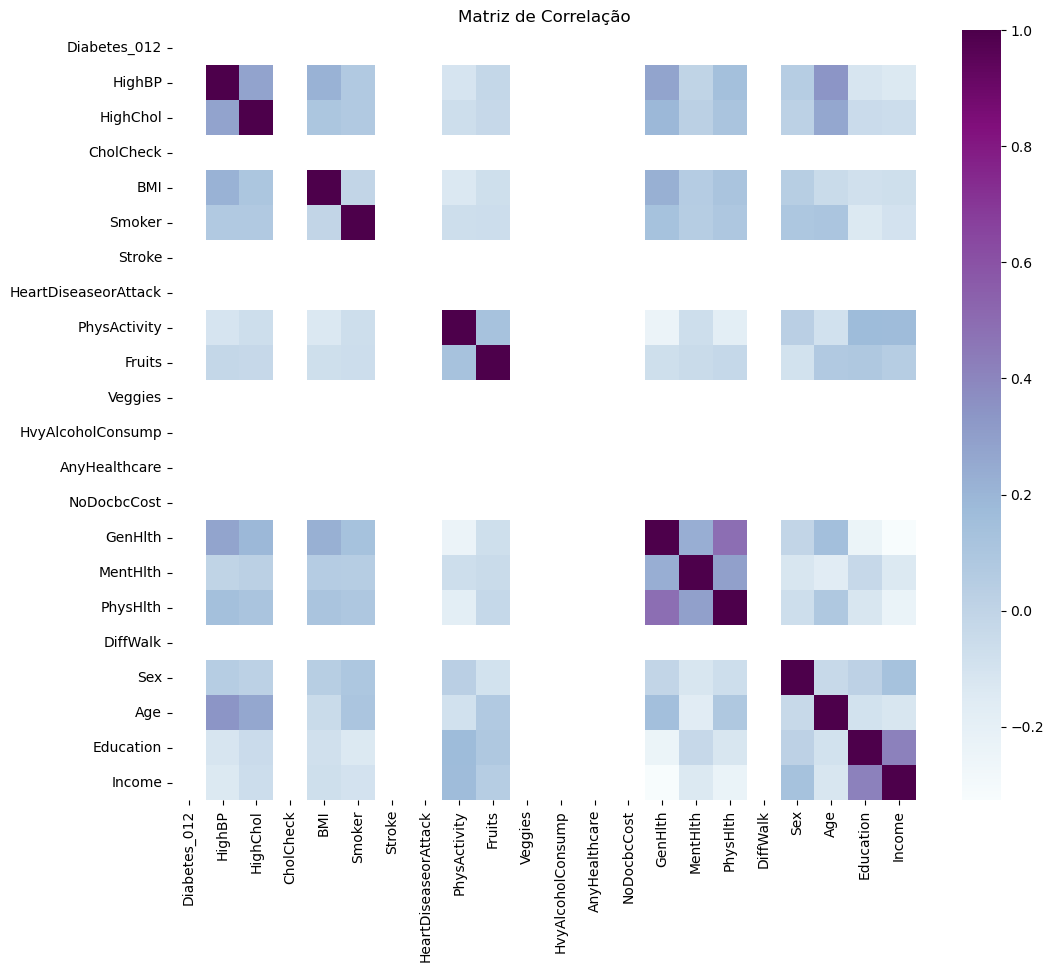

In [29]:
# matriz de correlação
correlation_matrix = db.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

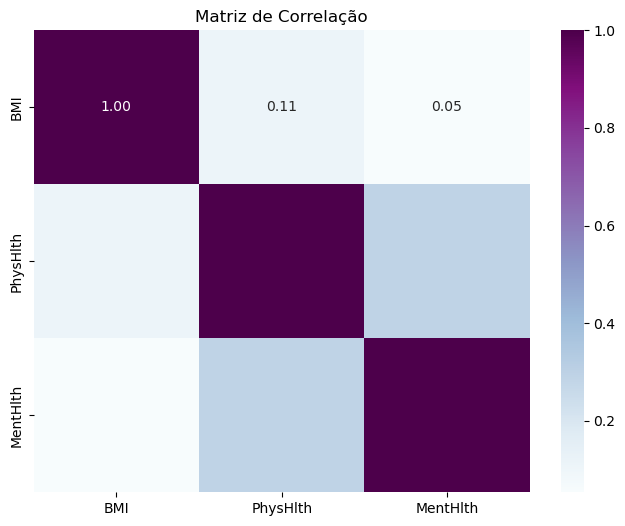

In [17]:
# matriz de correlação
correlation_matrix = db[['BMI', 'PhysHlth', 'MentHlth']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


C:\Users\livia\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


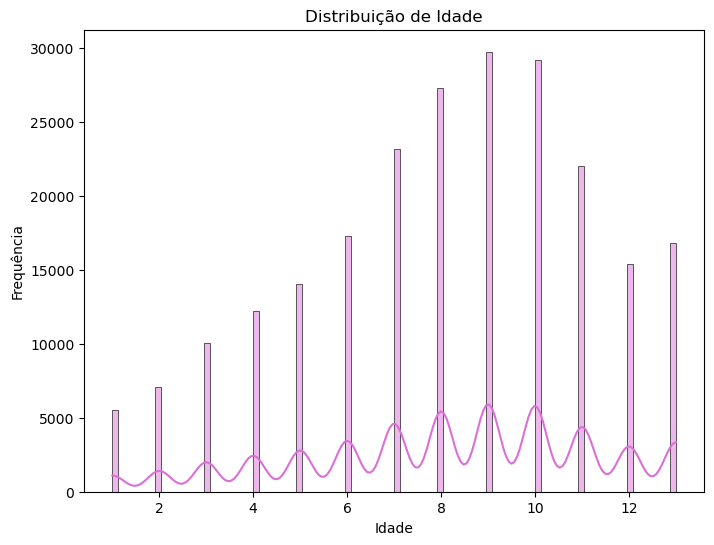

In [18]:
# histograma para a variável Age, para visualizar a distribuição etária.
plt.figure(figsize=(8, 6))
sns.histplot(db['Age'], kde=True, color='orchid')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

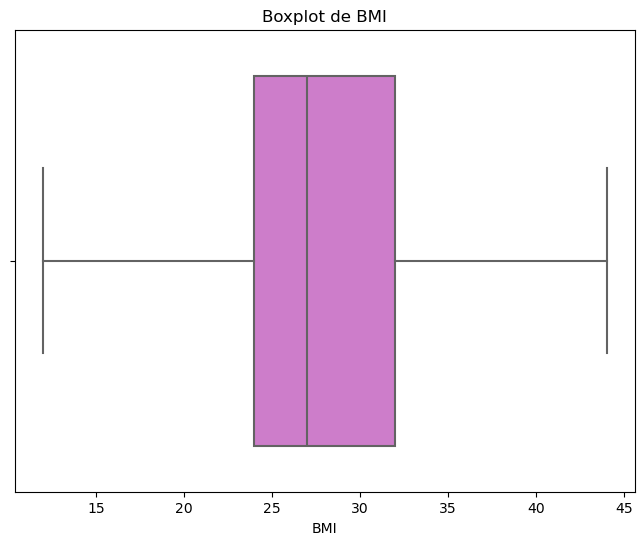

In [19]:
# boxplot para BMI, a fim de identificar outliers e entender a dispersão.
plt.figure(figsize=(8, 6))
sns.boxplot(x=db['BMI'], color='orchid')
plt.title('Boxplot de BMI')
plt.xlabel('BMI')
plt.show()


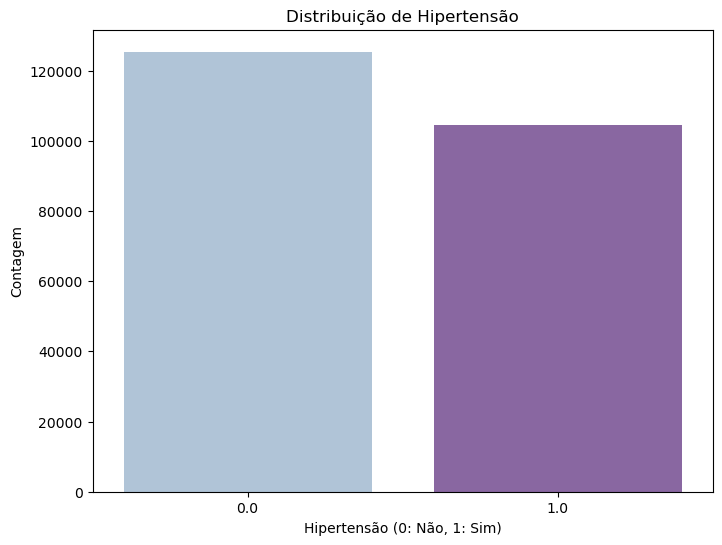

In [20]:
# gráfico de barras para HighBP
plt.figure(figsize=(8, 6))
sns.countplot(x='HighBP', data=db, palette='BuPu')
plt.title('Distribuição de Hipertensão')
plt.xlabel('Hipertensão (0: Não, 1: Sim)')
plt.ylabel('Contagem')
plt.show()

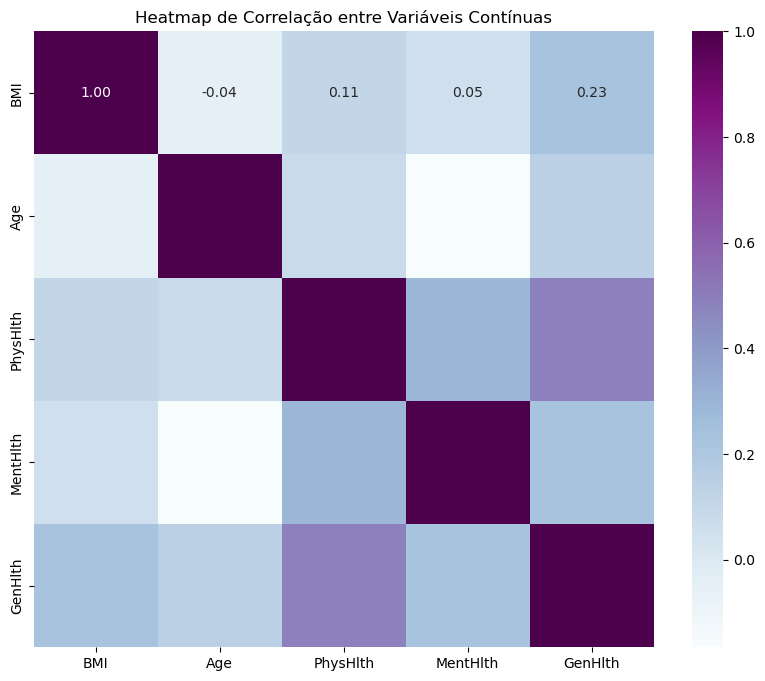

In [21]:
# heatmap de correlação entre as variáveis contínuas, como BMI, Age, PhysHlth, etc.

continuous_vars = ['BMI', 'Age', 'PhysHlth', 'MentHlth', 'GenHlth']
correlation_matrix_continuous = db[continuous_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_continuous, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Heatmap de Correlação entre Variáveis Contínuas')
plt.show()


In [22]:
# estatísticas descritivas
estatisticas = db.describe()

# exibindo o resultado
print(estatisticas)

# calcular estatísticas individuais
media = db.mean()
mediana = db.median()
desvio_padrao = db.std()
minimo = db.min()
maximo = db.max()

print("Média:", media)
print("Mediana:", mediana)
print("Desvio Padrão:", desvio_padrao)
print("Mínimo:", minimo)
print("Máximo:", maximo)

       Diabetes_012         HighBP       HighChol  CholCheck            BMI  \
count      229781.0  229781.000000  229781.000000   229781.0  229781.000000   
mean            0.0       0.454441       0.441760        1.0      28.467902   
std             0.0       0.497921       0.496598        0.0       5.883803   
min             0.0       0.000000       0.000000        1.0      12.000000   
25%             0.0       0.000000       0.000000        1.0      24.000000   
50%             0.0       0.000000       0.000000        1.0      27.000000   
75%             0.0       1.000000       1.000000        1.0      32.000000   
max             0.0       1.000000       1.000000        1.0      44.000000   

              Smoker    Stroke  HeartDiseaseorAttack   PhysActivity  \
count  229781.000000  229781.0              229781.0  229781.000000   
mean        0.465661       0.0                   0.0       0.733355   
std         0.498821       0.0                   0.0       0.442206   
min 

Age   Diabetes_012
1.0   0.0             100.0
2.0   0.0             100.0
3.0   0.0             100.0
4.0   0.0             100.0
5.0   0.0             100.0
6.0   0.0             100.0
7.0   0.0             100.0
8.0   0.0             100.0
9.0   0.0             100.0
10.0  0.0             100.0
11.0  0.0             100.0
12.0  0.0             100.0
13.0  0.0             100.0
Name: proportion, dtype: float64


<Figure size 1000x600 with 0 Axes>

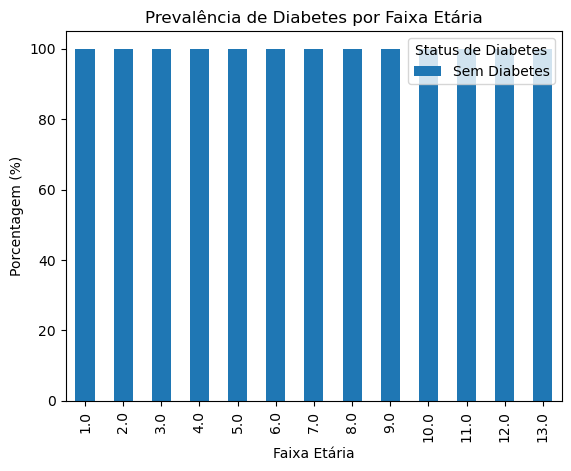

In [23]:
# comparar a diabetes por faixa etária
diabetes_por_faixa_etaria = db.groupby('Age')['Diabetes_012'].value_counts(normalize=True) * 100
print(diabetes_por_faixa_etaria)

# gráfico de barras para visualizar diabetes por faixa etária
plt.figure(figsize=(10, 6))
diabetes_por_faixa_etaria.unstack().plot(kind='bar', stacked=True)
plt.title('Prevalência de Diabetes por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Porcentagem (%)')
plt.legend(title='Status de Diabetes', labels=['Sem Diabetes', 'Pré-Diabetes', 'Diabetes'])
plt.show()


In [24]:
# teste de hipótese
# separar os dados em dois grupos: com diabetes e sem diabetes
grupo_com_diabetes = db[db['Diabetes_012'] == 2]['BMI']
grupo_sem_diabetes = db[db['Diabetes_012'] == 0]['BMI']

# realizar o teste t para comparar as médias dos dois grupos
t_statistic, p_value = stats.ttest_ind(grupo_com_diabetes, grupo_sem_diabetes)

# resultados do teste
print("Teste t para comparar a média do BMI entre indivíduos com e sem diabetes:")
print("Estatística t:", t_statistic)
print("Valor p:", p_value)

# resultados com o nível de significância
alpha = 0.05
if p_value < alpha:
  print("A diferença na média do BMI entre os grupos é estatisticamente significativa.")
else:
  print("A diferença na média do BMI entre os grupos não é estatisticamente significativa.")


Teste t para comparar a média do BMI entre indivíduos com e sem diabetes:
Estatística t: nan
Valor p: nan
A diferença na média do BMI entre os grupos não é estatisticamente significativa.


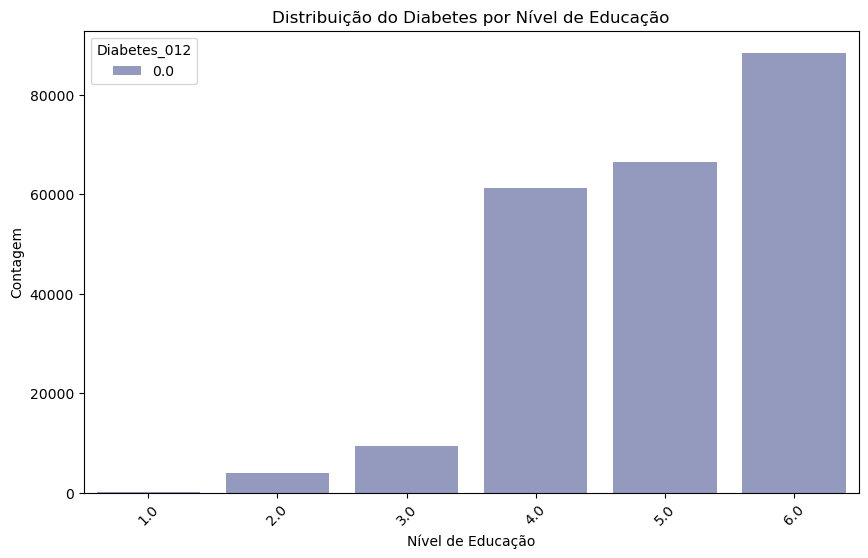

In [25]:
# nível de educação e diabetes
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Diabetes_012', data=db, palette='BuPu')
plt.title('Distribuição do Diabetes por Nível de Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

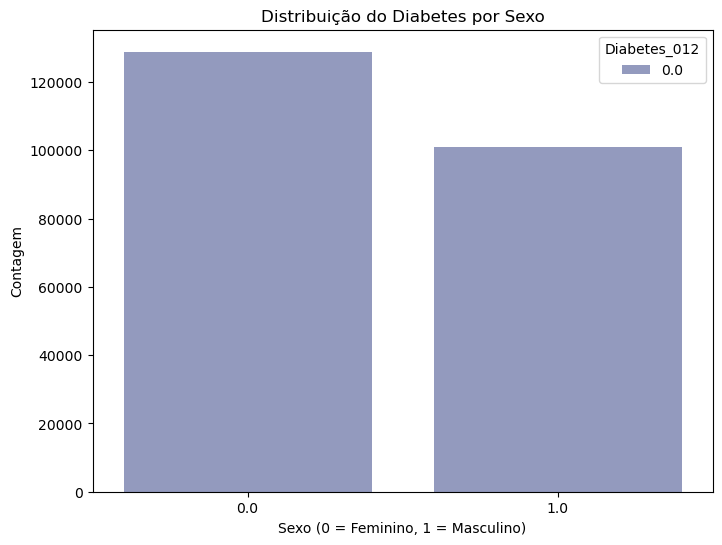

In [26]:
# comparando gênero e presença de diabetes
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Diabetes_012', data=db, palette='BuPu')
plt.title('Distribuição do Diabetes por Sexo')
plt.xlabel('Sexo (0 = Feminino, 1 = Masculino)')
plt.ylabel('Contagem')
plt.show()

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# variáveis preditoras (features) e alvo (target)
X = db[['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
         'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
         'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']]
y = db['Diabetes_012']  

# dividir o conjunto de dados em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# cria o modelo de árvore de decisão
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia da Árvore de Decisão: {accuracy:.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia da Árvore de Decisão: 1.00

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68935

    accuracy                           1.00     68935
   macro avg       1.00      1.00      1.00     68935
weighted avg       1.00      1.00      1.00     68935



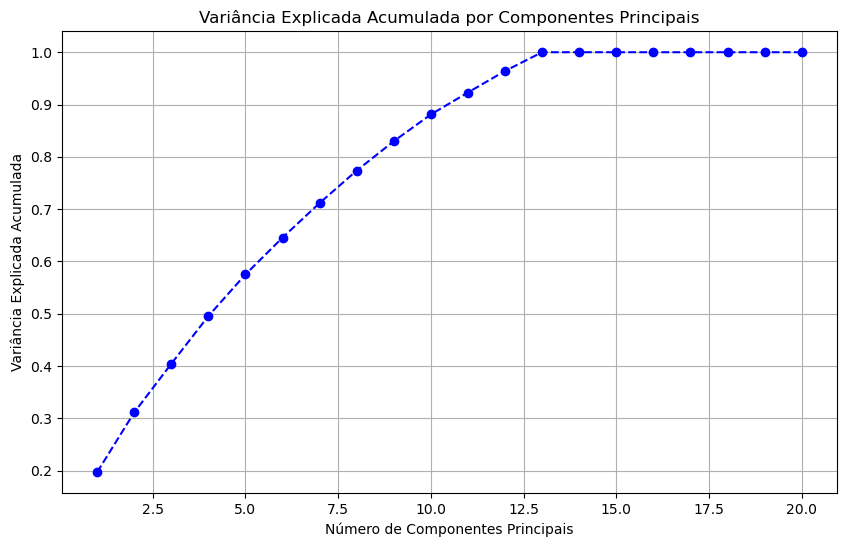

In [34]:
# import the StandardScaler class
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# variáveis que vamos usar para o PCA
X = db[['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
        'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
        'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']]

# padronização dos dados (média = 0, desvio padrão = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# aplicar o PCA e manter todas as componentes principais
pca = PCA()
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.title('Variância Explicada Acumulada por Componentes Principais')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)
plt.show()

pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=X_pca_2, columns=['PC1', 'PC2'])
df_pca['Diabetes_012'] = db['Diabetes_012']

Chi2 (AnyHealthcare vs Diabetes_012): 0.0, p-valor: 1.0
Chi2 (NoDocbcCost vs Diabetes_012): 0.0, p-valor: 1.0


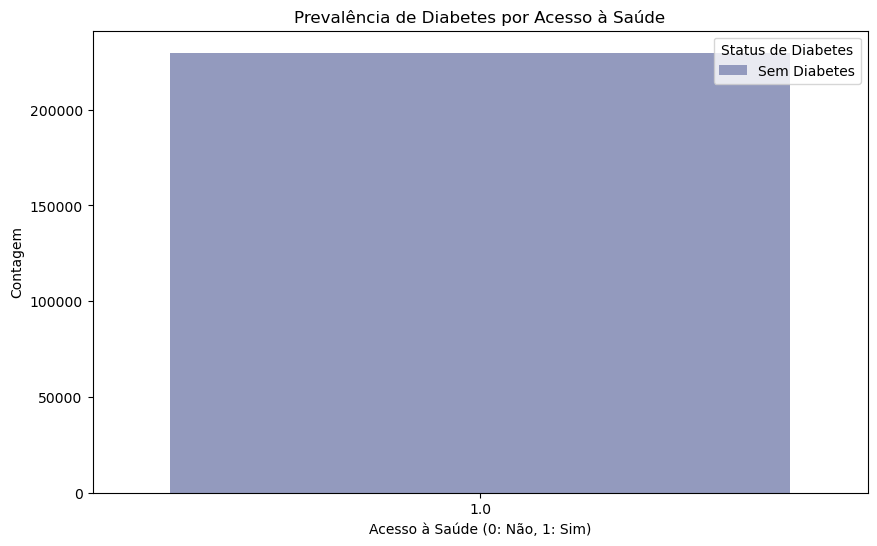

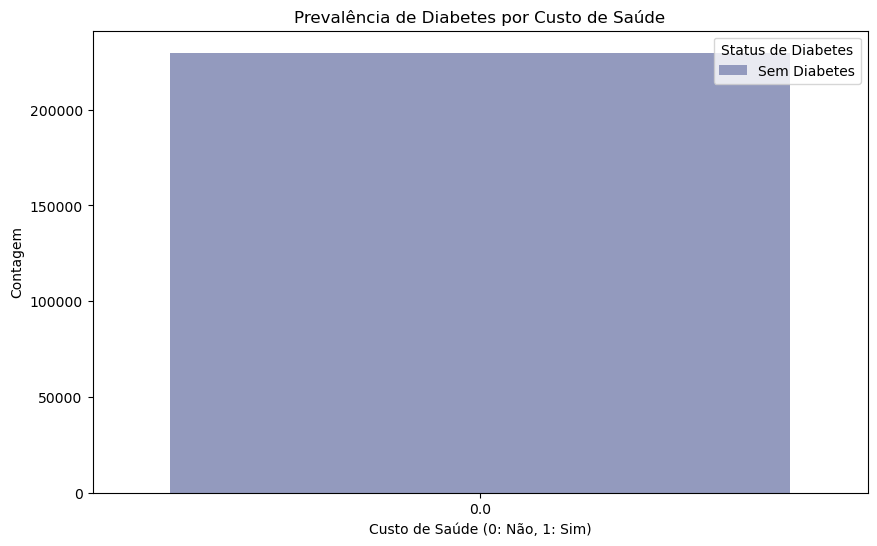

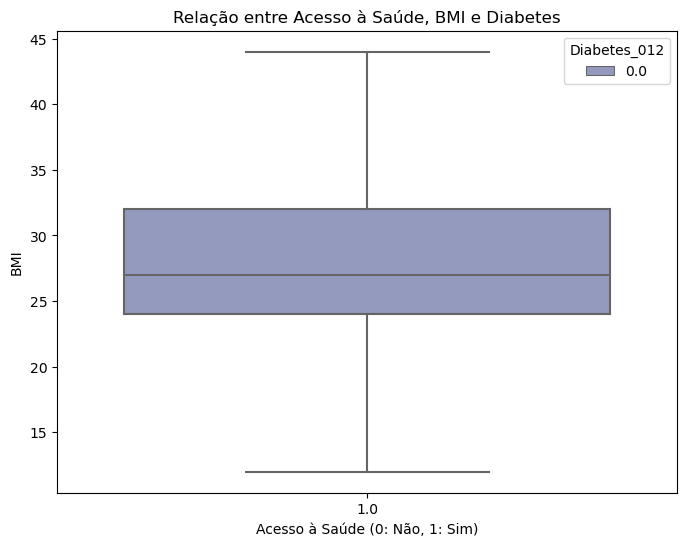

In [35]:
# tabela de contingência entre AnyHealthcare e Diabetes_012
contingency_table_healthcare_diabetes = pd.crosstab(db['AnyHealthcare'], db['Diabetes_012'])

# teste qui-quadrado para AnyHealthcare e Diabetes_012
chi2_healthcare_diabetes, p_healthcare_diabetes, dof_healthcare_diabetes, expected_healthcare_diabetes = chi2_contingency(
    contingency_table_healthcare_diabetes)
print(f"Chi2 (AnyHealthcare vs Diabetes_012): {chi2_healthcare_diabetes}, p-valor: {p_healthcare_diabetes}")

# tabela de contingência entre NoDocbcCost e Diabetes_012
contingency_table_nodocbccost_diabetes = pd.crosstab(db['NoDocbcCost'], db['Diabetes_012'])

# teste qui-quadrado para NoDocbcCost e Diabetes_012
chi2_nodocbccost_diabetes, p_nodocbccost_diabetes, dof_nodocbccost_diabetes, expected_nodocbccost_diabetes = chi2_contingency(
    contingency_table_nodocbccost_diabetes)
print(f"Chi2 (NoDocbcCost vs Diabetes_012): {chi2_nodocbccost_diabetes}, p-valor: {p_nodocbccost_diabetes}")

# gráfico de barras para visualizar a prevalência de diabetes por acesso à saúde
plt.figure(figsize=(10, 6))
sns.countplot(x='AnyHealthcare', hue='Diabetes_012', data=db, palette='BuPu')
plt.title('Prevalência de Diabetes por Acesso à Saúde')
plt.xlabel('Acesso à Saúde (0: Não, 1: Sim)')
plt.ylabel('Contagem')
plt.legend(title='Status de Diabetes', labels=['Sem Diabetes', 'Pré-Diabetes', 'Diabetes'])
plt.show()

# gráfico de barras para visualizar a prevalência de diabetes por custo de saúde
plt.figure(figsize=(10, 6))
sns.countplot(x='NoDocbcCost', hue='Diabetes_012', data=db, palette='BuPu')
plt.title('Prevalência de Diabetes por Custo de Saúde')
plt.xlabel('Custo de Saúde (0: Não, 1: Sim)')
plt.ylabel('Contagem')
plt.legend(title='Status de Diabetes', labels=['Sem Diabetes', 'Pré-Diabetes', 'Diabetes'])
plt.show()

# analisar a relação entre acesso à saúde e outros fatores de risco para diabetes
plt.figure(figsize=(8, 6))
sns.boxplot(x='AnyHealthcare', y='BMI', hue='Diabetes_012', data=db, palette='BuPu')
plt.title('Relação entre Acesso à Saúde, BMI e Diabetes')
plt.xlabel('Acesso à Saúde (0: Não, 1: Sim)')
plt.ylabel('BMI')
plt.show()


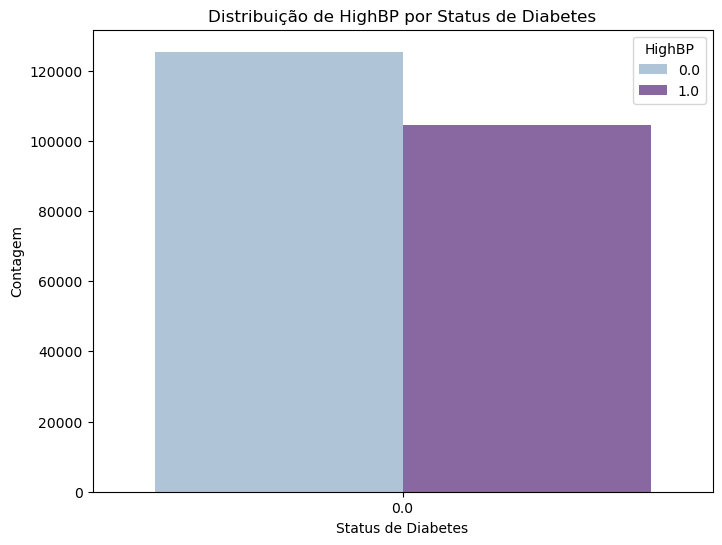

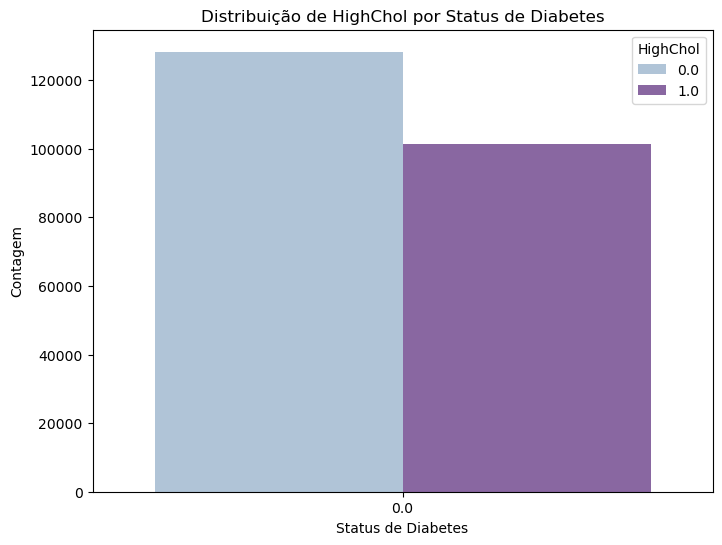

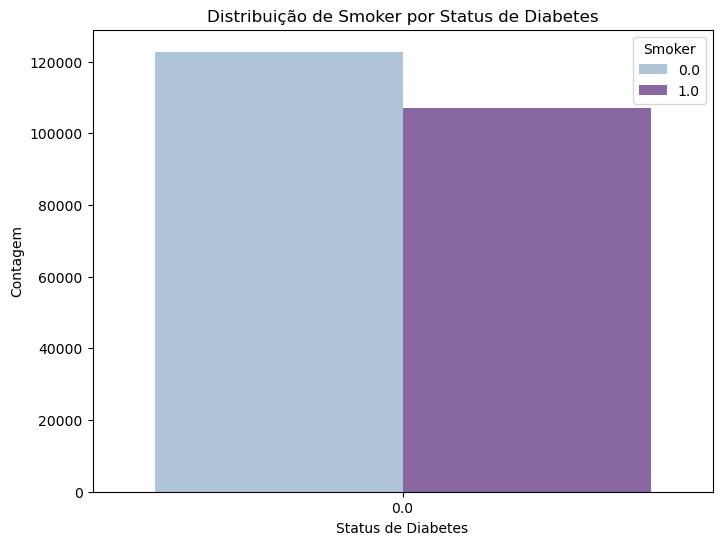

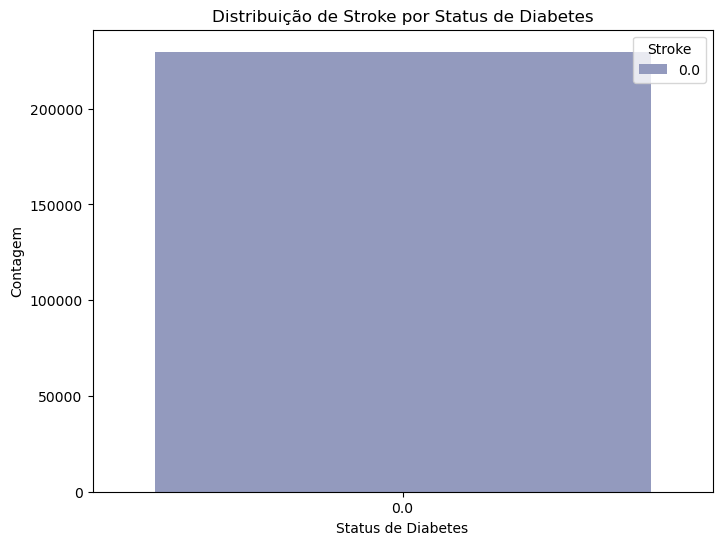

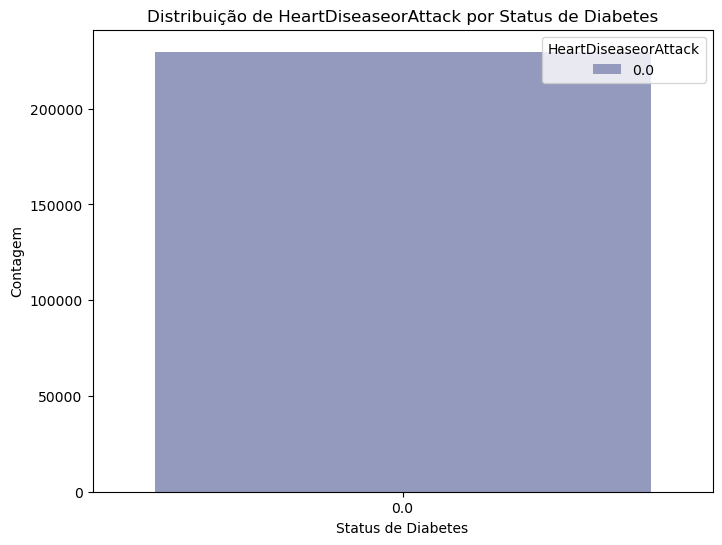

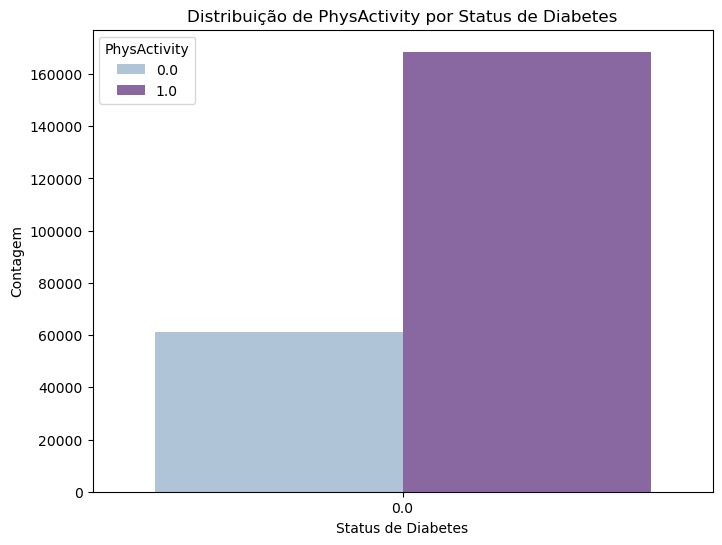

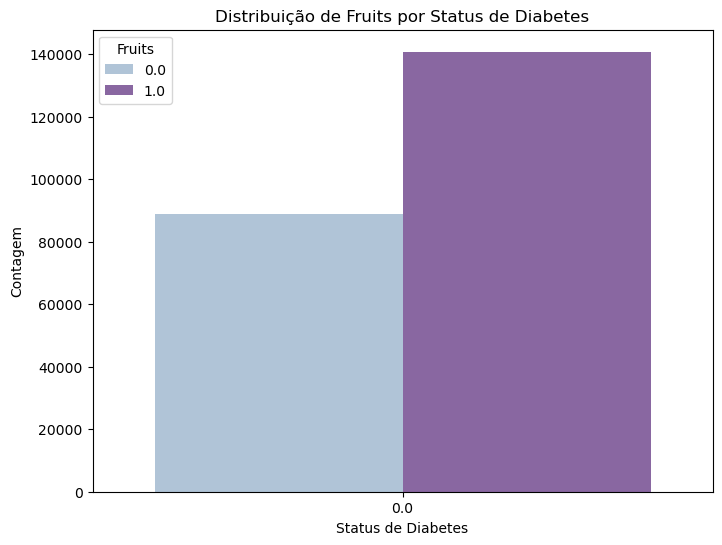

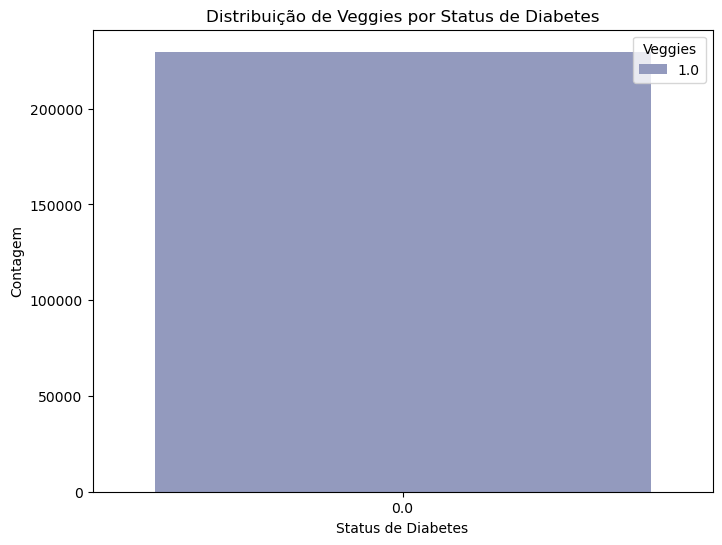

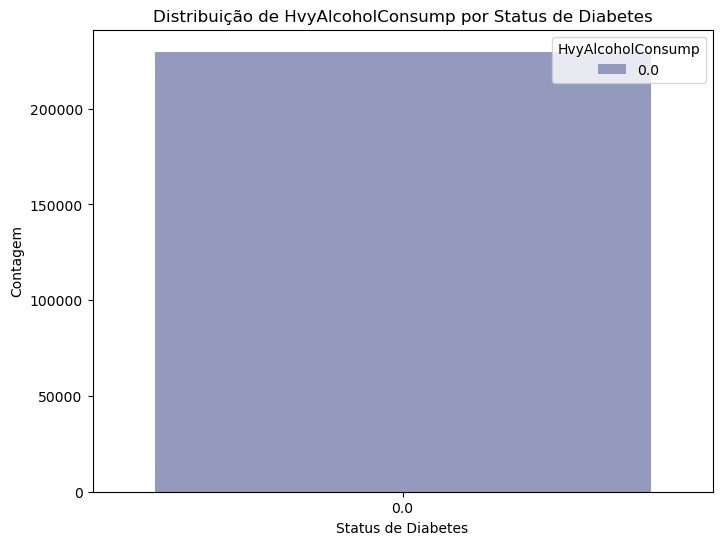

In [36]:
# gráfico de barras comparando as variáveis categóricas com a presença de diabetes
variables = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Diabetes_012', hue=var, data=db, palette='BuPu')
    plt.title(f'Distribuição de {var} por Status de Diabetes')
    plt.xlabel('Status de Diabetes')
    plt.ylabel('Contagem')
    plt.legend(title=var)
    plt.show()